In [2]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from sklearn.neural_network import MLPClassifier


In [7]:
f = open("two_spirals.dat", "r")
data = np.loadtxt(f)

X = data[:, 0:2]  # x, y data points 
Y = data[:, 2]   # labels 1 or 0

Xi_shape = (len(X), 1, 2)
Yi_shape = (len(Y), 1, 1)

train_test_split = 0.9
print(X,Y)
f'{X[0]} -> {Y[0]}'

[[ 4.47485e+00 -8.90040e-01]
 [-4.47485e+00  8.90040e-01]
 [ 4.50000e+00  7.00000e-05]
 [-4.50000e+00 -7.00000e-05]
 [ 4.35222e+00  8.65780e-01]
 [-4.35222e+00 -8.65780e-01]
 [ 4.04195e+00  1.67430e+00]
 [-4.04195e+00 -1.67430e+00]
 [ 3.58567e+00  2.39595e+00]
 [-3.58567e+00 -2.39595e+00]
 [ 3.00515e+00  3.00525e+00]
 [-3.00515e+00 -3.00525e+00]
 [ 2.32639e+00  3.48182e+00]
 [-2.32639e+00 -3.48182e+00]
 [ 1.57850e+00  3.81103e+00]
 [-1.57850e+00 -3.81103e+00]
 [ 7.92480e-01  3.98445e+00]
 [-7.92480e-01 -3.98445e+00]
 [-7.00000e-05  4.00000e+00]
 [ 7.00000e-05 -4.00000e+00]
 [-7.68240e-01  3.86183e+00]
 [ 7.68240e-01 -3.86183e+00]
 [-1.48297e+00  3.58000e+00]
 [ 1.48297e+00 -3.58000e+00]
 [-2.11817e+00  3.16994e+00]
 [ 2.11817e+00 -3.16994e+00]
 [-2.65170e+00  2.65160e+00]
 [ 2.65170e+00 -2.65160e+00]
 [-3.06609e+00  2.04860e+00]
 [ 3.06609e+00 -2.04860e+00]
 [-3.34909e+00  1.38716e+00]
 [ 3.34909e+00 -1.38716e+00]
 [-3.49406e+00  6.94930e-01]
 [ 3.49406e+00 -6.94930e-01]
 [-3.50000e+00

'[ 4.47485 -0.89004] -> 1.0'

In [4]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
        {
            'activation' : ['tanh'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (4,2),(5,2),(6,2),(7,2),(8,2)#,(9,),(10,),(11,),(12,),(13,),(14,),(15,)
             ]
        }
       ]

number_of_datapoints = len(X)
train_test_split = int(0.5*number_of_datapoints)
X_train, X_test = X[:train_test_split], X[train_test_split:]
Y_train, Y_test = Y[:train_test_split], Y[train_test_split:]

# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp = GridSearchCV(MLPClassifier(), param_grid, cv=5, scoring='accuracy')
    mlp.fit(X,Y)
    print("Best parameters set found on development set:")
    print(mlp.best_params_)

print("Training set score: %f" % mlp.score(X_train, Y_train))
print("Test set score: %f" % mlp.score(X_test, Y_test))

# plt.show()
clf = MLPClassifier(activation='tanh', hidden_layer_sizes=(8,2), solver='lbfgs')
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

Best parameters set found on development set:
{'activation': 'tanh', 'hidden_layer_sizes': (4, 2), 'solver': 'lbfgs'}
Training set score: 0.621212
Test set score: 0.621212


c:\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7121212121212122

Minimising error measure
Using Particle Swarm Optimisation (PSO)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     11     3.96e+07   0:00.0
1     22     1.92e+07   0:00.0
2     33     1.92e+07   0:00.0
3     44     1.92e+07   0:00.0
20    231    175927.2   0:00.0
40    451    175927.2   0:00.0
60    671    175927.2   0:00.0
80    891    175927.2   0:00.0
100   1111   175927.2   0:00.1
120   1331   145728.9   0:00.1
140   1551   120603.5   0:00.1
160   1771   120603.5   0:00.1
180   1991   120603.5   0:00.1
200   2211   120603.5   0:00.1
220   2431   120603.5   0:00.1
240   2651   120603.5   0:00.1
260   2871   120603.5   0:00.1
280   3091   120603.5   0:00.2
300   3311   120603.5   0:00.2
320   3531   120603.5   0:00.2
337   3707   120603.5   0:00.2
Halting: No significant change for 200 iterations.
Score at true solution: 
103704.34692648122
Found solution:          True parameters:
 1.52279977006589389e-02     1.49999999999999994e-02
 4.9680791137634

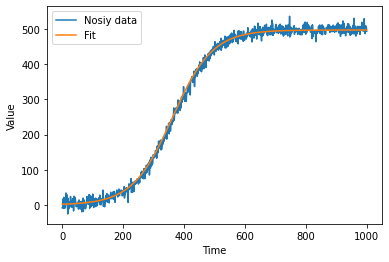

In [5]:
# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])

# Perform an optimization with boundaries and hints
x0 = [0, 700]
found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.PSO,
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()